### Import Function and Libraries

In [128]:
import pandas as pd 
import numpy as np 
import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from Data_Retrieval import DataRetrieval
from CC_test import CCstudy
import itertools
from pandas_datareader import data as pdr
from yahooquery import Ticker

In [3]:
from time import time
from pathlib import Path
from tqdm import tqdm 

import numpy as np
from numpy.linalg import LinAlgError
import pandas as pd

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV

from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Industry and Sector dictionary

In [144]:
def classification(tickers):
    tickers = Ticker(tickers, asynchronous=True)
    
    datasi = tickers.get_modules("summaryProfile quoteType")
    dfsi = pd.DataFrame.from_dict(datasi).T
    dataframes = [pd.json_normalize([x for x in dfsi[module] if isinstance(x, dict)]) for
    module in ['summaryProfile', 'quoteType']]
    
    dfsi = pd.concat(dataframes, axis=1)
    
    dfsi = pd.DataFrame(dfsi.set_index('symbol'))
    dfsi=dfsi[['industry', 'sector']].reset_index()
    return dfsi


In [172]:
def categorize(column,list):
    column=column.to_frame()
    new=column.merge(list,how='left',left_index=True,right_on='symbol')
    return new
    

### Import TW exchange counters

Our main focus in on Taiwan exchange counters hence we will import taiwan exchange ticker code and retrieve the adjusted closing price from yahoo finance API.

In [146]:
counter_code = pd.read_csv('taiwan_stocks.csv')

In [148]:
tickers = list(counter_code.iloc[:,2].apply(lambda x: str(x)+".tw"))

In [150]:
classlist = classification(tickers)

In [59]:
#tickers = ['2330.tw','0052.TW']
start_date = "2022-01-01"
end_date = "2024-11-30"

if tickers is not None:
    merged_df = DataRetrieval.retrieve_and_merge_data(tickers, start_date, end_date)
else:
    print("Error: tickers is None")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [61]:
merged_df = merged_df.dropna(axis=1, how='any')

### Correlation and Cointegration Study 

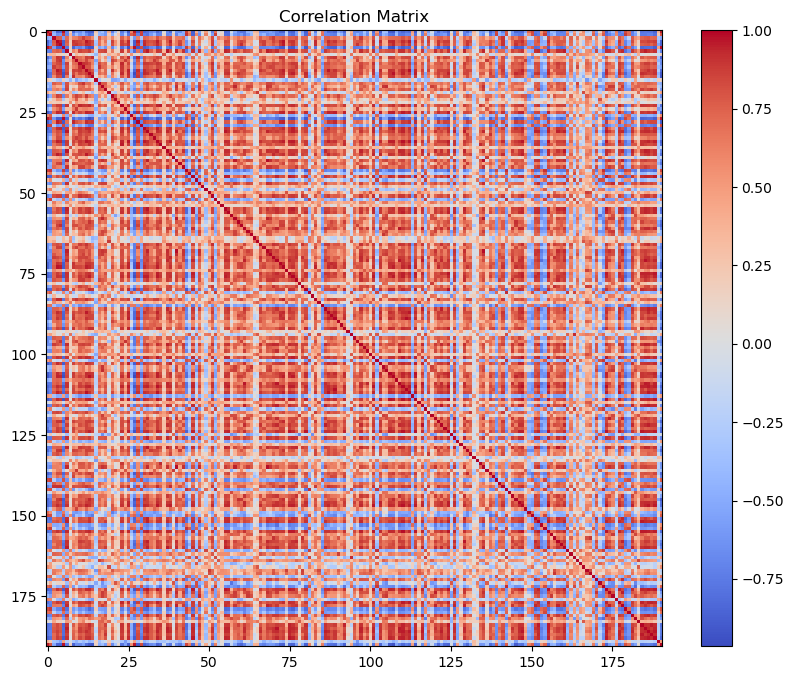


Cointegration Test Results:


In [64]:
cc_study = CCstudy(merged_df)
table = cc_study.main()

In [65]:
table.sort_values(by=['Cointegration result','correlation'],ascending =[True,False])

,ticker1,ticker2,Cointegration result,correlation
18104,9958.tw,8112.tw,1.424790e-07,0.174791
10057,2332.tw,3380.tw,5.064842e-07,0.518455
18097,8454.tw,6139.tw,1.310810e-06,0.140733
9231,2105.tw,6139.tw,2.228711e-06,0.094316
4194,2801.tw,3042.tw,5.459342e-06,0.253162
...,...,...,...,...
17654,3706.tw,1717.tw,1.000000e+00,0.211808
9740,2312.tw,2615.tw,1.000000e+00,0.200465
14722,3653.tw,2615.tw,1.000000e+00,0.168688
11570,2404.tw,2615.tw,1.000000e+00,0.141103


In [176]:
table[(table['Cointegration result'] < 0.05)].sort_values(by=['correlation','Cointegration result'],ascending =[False,True])

,ticker1,ticker2,Cointegration result,correlation
1451,2409.tw,6116.tw,0.022982,0.706749
12530,2492.tw,2327.tw,0.031415,0.669245
4128,2801.tw,2892.tw,0.015636,0.664854
6914,3231.tw,2356.tw,0.014472,0.618394
4127,2801.tw,2885.tw,0.001035,0.614807
...,...,...,...,...
14175,3042.tw,4904.tw,0.027811,-0.008434
13141,2605.tw,4904.tw,0.014545,-0.022672
11421,2401.tw,4904.tw,0.034079,-0.036389
16380,3406.tw,4904.tw,0.019720,-0.044875


In [152]:
classlist

,symbol,industry,sector
0,1303.TW,Specialty Chemicals,Basic Materials
1,2409.TW,Electronic Components,Technology
2,2330.TW,Semiconductors,Technology
3,2002.TW,Steel,Basic Materials
4,2303.TW,Semiconductors,Technology
...,...,...,...
188,1503.TW,Electrical Equipment & Parts,Industrials
189,5876.TW,Banks - Regional,Financial Services
190,6139.TW,Engineering & Construction,Industrials
191,6505.TW,Oil & Gas Refining & Marketing,Energy


In [174]:
categorize(table['ticker1'],classlist)

ValueError: You are trying to merge on int64 and object columns for key 'symbol'. If you wish to proceed you should use pd.concat